# Imports

In [25]:
import os
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import math
import open3d as o3d
import pyvista
import nibabel as nib
from skimage.measure import marching_cubes
import copy

# Functions

In [26]:
def pad_edge_list(edges):
    padding = np.ones(edges.shape[0], int)*3
    edges_w_padding = np.vstack((padding, edges.T)).T
    return edges_w_padding

def organs_data(abdominal_segmentations_data):
    try:
        verts1, faces1, norms1, vals1 = marching_cubes(abdominal_segmentations_data==1, level=0, step_size=1)
        verts2, faces2, norms2, vals2 = marching_cubes(abdominal_segmentations_data==2, level=0, step_size=1)
        verts3, faces3, norms3, vals3 = marching_cubes(abdominal_segmentations_data==3, level=0, step_size=1)
        verts4, faces4, norms4, vals4 = marching_cubes(abdominal_segmentations_data==4, level=0, step_size=1)
        verts5, faces5, norms5, vals5 = marching_cubes(abdominal_segmentations_data==5, level=0, step_size=1)
        
        verts1 = verts1/np.array(abdominal_segmentations_data.shape) 
        verts2 = verts2/np.array(abdominal_segmentations_data.shape) 
        verts3 = verts3/np.array(abdominal_segmentations_data.shape) 
        verts4 = verts4/np.array(abdominal_segmentations_data.shape) # to normalize ponit coordinate in [0,1]
        verts5 = verts5/np.array(abdominal_segmentations_data.shape) # to normalize ponit coordinate in [0,1]
        
        edges1 = np.concatenate((faces1[:,:2], faces1[:,1:]), axis=0)
        edges2 = np.concatenate((faces2[:,:2], faces2[:,1:]), axis=0)
        edges3 = np.concatenate((faces3[:,:2], faces3[:,1:]), axis=0)
        edges4 = np.concatenate((faces4[:,:2], faces4[:,1:]), axis=0)
        edges5 = np.concatenate((faces5[:,:2], faces5[:,1:]), axis=0)

        lines1 = np.concatenate((np.int32(2*np.ones((edges1.shape[0],1))), edges1), 1)
        lines2 = np.concatenate((np.int32(2*np.ones((edges2.shape[0],1))), edges2), 1)
        lines3 = np.concatenate((np.int32(2*np.ones((edges3.shape[0],1))), edges3), 1)
        lines4 = np.concatenate((np.int32(2*np.ones((edges4.shape[0],1))), edges4), 1)
        lines5 = np.concatenate((np.int32(2*np.ones((edges5.shape[0],1))), edges5), 1)
        
        mesh1 = pyvista.PolyData(verts1, pad_edge_list(faces1))
        mesh2 = pyvista.PolyData(verts2, pad_edge_list(faces2))
        mesh3 = pyvista.PolyData(verts3, pad_edge_list(faces3))
        mesh4 = pyvista.PolyData(verts4, pad_edge_list(faces4))
        mesh5 = pyvista.PolyData(verts5, pad_edge_list(faces5))

        mesh1.lines = lines1.flatten()
        mesh2.lines = lines2.flatten()
        mesh3.lines = lines3.flatten()
        mesh4.lines = lines4.flatten()
        mesh5.lines = lines5.flatten()

        # verts = [verts1, verts2, verts3, verts4, verts5]
        # edges = [edges1, edges2, edges3, edges4, edges5]
        # faces = [faces1, faces2, faces3, faces4, faces5]
        # lines = [lines1, lines2, lines3, lines4, lines5]
        # meshes = [mesh1, mesh2, mesh3, mesh4, mesh5]
        # norms = [norms1, norms2, norms3, norms4, norms5]
        # vals = [vals1, vals2, vals3, vals4, vals5]

        #verts = [verts1]
        #edges = [edges1]
        #faces = [faces1]
        #lines = [lines1]
        #meshes = [mesh1]
        #norms = [norms1]
        #vals = [vals1]
        
        organ1 = [verts1, edges1, faces1, lines1, mesh1, norms1, vals1]
        organ2 = [verts2, edges2, faces2, lines2, mesh2, norms2, vals2]
        organ3 = [verts3, edges3, faces3, lines3, mesh3, norms3, vals3]
        organ4 = [verts4, edges4, faces4, lines4, mesh4, norms4, vals4]
        organ5 = [verts5, edges5, faces5, lines5, mesh5, norms5, vals5]

        #data = [verts, edges, faces, lines, meshes, norms, vals]
        organs_data = [organ1, organ2, organ3, organ4, organ5]
        return organs_data
    except:
        x=0
        
def triangle_mesh(data):
    verts = data[0]
    faces = data[2]
    mesh_list = []
    mesh_list.append(o3d.geometry.TriangleMesh(vertices = o3d.utility.Vector3dVector(np.asarray(verts)), triangles = o3d.utility.Vector3iVector(np.asarray(faces))))
    return mesh_list

def draw_preproccessing(source, target):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([255, 0, 0])
    target_temp.paint_uniform_color([0, 0.3, 0.5])
    o3d.visualization.draw_geometries([source_temp, target_temp])

# Data

In [3]:
basic_features = pd.read_csv("basic_features.csv")
id_bridge = pd.read_csv("Bridge_eids_60520_87802.csv")
basic_features_without_nans =  basic_features[basic_features["21003-2.0"].notna()]
basic_features_without_nans.rename(columns = {'21003-2.0':'age', '31-0.0':'sex', '21001-2.0':'BMI', '21002-2.0':'weight', '50-2.0':'height'}, inplace = True)
basic_features_without_nans

/tmp/ipykernel_3528693/2527619189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_features_without_nans.rename(columns = {'21003-2.0':'age', '31-0.0':'sex', '21001-2.0':'BMI', '21002-2.0':'weight', '50-2.0':'height'}, inplace = True)


,eid,age,sex,BMI,weight,height
6,1000071,69.0,0,30.8012,74.0,155.0
9,1000109,75.0,0,26.5036,68.7,161.0
11,1000125,65.0,1,23.6488,61.3,161.0
17,1000180,58.0,1,32.6204,99.9,175.0
18,1000191,72.0,1,24.6337,83.4,184.0
...,...,...,...,...,...,...
502334,6023367,58.0,1,35.2653,118.1,183.0
502339,6023419,66.0,1,23.9048,69.9,171.0
502368,6023708,56.0,0,21.5288,57.2,163.0
502376,6023786,57.0,0,22.7595,56.1,157.0


# Poster Visualizations

### Patients' data distributions

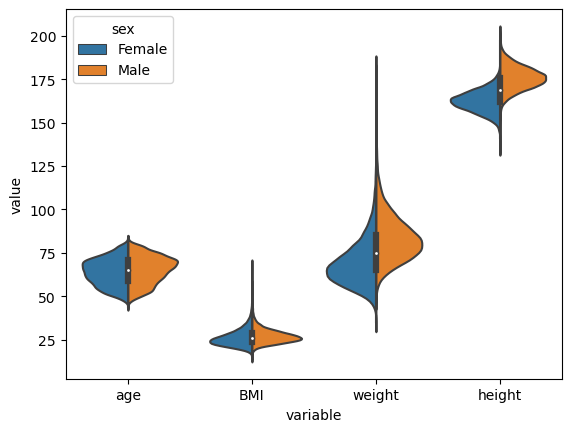

In [4]:
violin_df = pd.melt(basic_features_without_nans, value_vars=['age', 'BMI', 'weight', 'height'], id_vars='sex')
violin_df = violin_df.assign(sex=violin_df.sex.map({0: "Female", 1: "Male"}))
violin_plot = sns.violinplot(x='variable', y='value', hue='sex', data=violin_df, split=True, legend=False)
fig = violin_plot.get_figure()
fig.savefig("violin_plot.png") 

<Figure size 400x300 with 0 Axes>

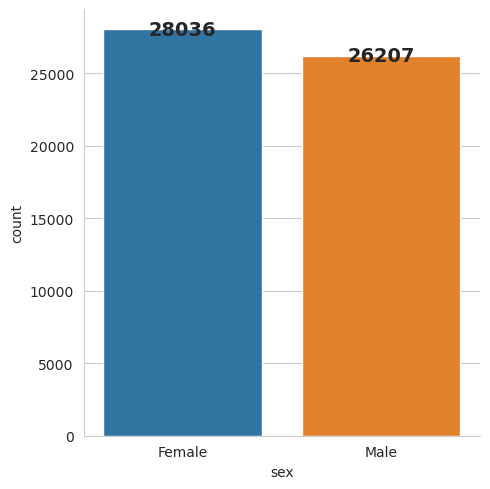

In [31]:
plt.figure(figsize=(4, 3))
sex_df = basic_features_without_nans.assign(sex=basic_features_without_nans.sex.map({0: "Female", 1: "Male"}))
plot = sns.catplot(x='sex', kind='count', data=sex_df)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)

## Meshes Visualizations

### Decimation

In [ ]:
#process mesh data 
abdominal_segmentations = nib.load('./organ_segmentations/1000071/prd.nii.gz')
abdominal_segmentations_data = abdominal_segmentations.get_fdata()
data = organs_data(abdominal_segmentations_data)
# with open3d: triangle mesh
mesh = triangle_mesh(data[0])
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0, 0.3, 0.5]) 
vis.create_window()
vis.add_geometry(mesh)
vis.poll_events()
vis.update_renderer()
o3d.visualization.draw_geometries([mesh])

In [ ]:
dec_liver_mesh = o3d.io.read_triangle_mesh("./female_organ_decimations_ply/1000071/liver_mesh.ply")
mesh = dec_liver_mesh
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0, 0.3, 0.5]) 
vis.create_window()
vis.add_geometry(mesh)
vis.poll_events()
vis.update_renderer()
o3d.visualization.draw_geometries([mesh])

### Registeration

In [85]:
#load PCD data
src = o3d.io.read_point_cloud("./male_organ_decimations_ply/1000180/liver_mesh.ply")
target = o3d.io.read_point_cloud("./male_organ_decimations_ply/3849529/liver_mesh.ply")

draw_preproccessing(src, target)

[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]


In [86]:
#load PCD data
src = o3d.io.read_point_cloud("./organ_registrations_ply/1000180/liver_mesh.ply")
target = o3d.io.read_point_cloud("./organ_registrations_ply/3849529/liver_mesh.ply")

draw_preproccessing(src, target)

[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]


In [23]:
abdominal_segmentations = nib.load('./organ_segmentations/1000071/prd.nii.gz')
abdominal_segmentations_data = abdominal_segmentations.get_fdata()
verts1, faces1, norms1, vals1 = marching_cubes(abdominal_segmentations_data==1, level=0, step_size=1)
verts2, faces2, norms2, vals2 = marching_cubes(abdominal_segmentations_data==2, level=0, step_size=1)
verts3, faces3, norms3, vals3 = marching_cubes(abdominal_segmentations_data==3, level=0, step_size=1)
verts4, faces4, norms4, vals4 = marching_cubes(abdominal_segmentations_data==4, level=0, step_size=1)
verts5, faces5, norms5, vals5 = marching_cubes(abdominal_segmentations_data==5, level=0, step_size=1)

verts1 = verts1/np.array(abdominal_segmentations_data.shape) 
verts2 = verts2/np.array(abdominal_segmentations_data.shape) 
verts3 = verts3/np.array(abdominal_segmentations_data.shape) 
verts4 = verts4/np.array(abdominal_segmentations_data.shape) # to normalize ponit coordinate in [0,1]
verts5 = verts5/np.array(abdominal_segmentations_data.shape) # to normalize ponit coordinate in [0,1]

edges1 = np.concatenate((faces1[:,:2], faces1[:,1:]), axis=0)
edges2 = np.concatenate((faces2[:,:2], faces2[:,1:]), axis=0)
edges3 = np.concatenate((faces3[:,:2], faces3[:,1:]), axis=0)
edges4 = np.concatenate((faces4[:,:2], faces4[:,1:]), axis=0)
edges5 = np.concatenate((faces5[:,:2], faces5[:,1:]), axis=0)

lines1 = np.concatenate((np.int32(2*np.ones((edges1.shape[0],1))), edges1), 1)
lines2 = np.concatenate((np.int32(2*np.ones((edges2.shape[0],1))), edges2), 1)
lines3 = np.concatenate((np.int32(2*np.ones((edges3.shape[0],1))), edges3), 1)
lines4 = np.concatenate((np.int32(2*np.ones((edges4.shape[0],1))), edges4), 1)
lines5 = np.concatenate((np.int32(2*np.ones((edges5.shape[0],1))), edges5), 1)

mesh1 = pyvista.PolyData(verts1, pad_edge_list(faces1))
mesh2 = pyvista.PolyData(verts2, pad_edge_list(faces2))
mesh3 = pyvista.PolyData(verts3, pad_edge_list(faces3))
mesh4 = pyvista.PolyData(verts4, pad_edge_list(faces4))
mesh5 = pyvista.PolyData(verts5, pad_edge_list(faces5))

mesh1.lines = lines1.flatten()
mesh2.lines = lines2.flatten()
mesh3.lines = lines3.flatten()
mesh4.lines = lines4.flatten()
mesh5.lines = lines5.flatten()
organ1 = [verts1, edges1, faces1, lines1, mesh1, norms1, vals1]
organ2 = [verts2, edges2, faces2, lines2, mesh2, norms2, vals2]
organ3 = [verts3, edges3, faces3, lines3, mesh3, norms3, vals3]
organ4 = [verts4, edges4, faces4, lines4, mesh4, norms4, vals4]
organ5 = [verts5, edges5, faces5, lines5, mesh5, norms5, vals5]

#data = [verts, edges, faces, lines, meshes, norms, vals]
organs_data = [organ1, organ2, organ3, organ4, organ5]

liver_mesh = triangle_mesh(organs_data[0])
mesh = liver_mesh[0]
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0, 0.55, 1]) 
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)
#line_mesh = o3d.geometry.LineSet.create_from_triangle_mesh(mesh)
#line_mesh.paint_uniform_color([0, 0.3, 0.5]) 
#o3d.visualization.draw_geometries([line_mesh])

In [30]:
dec_liver_mesh = o3d.io.read_triangle_mesh("./female_organ_decimations_ply/1000071/pancreas_mesh.ply")
mesh = dec_liver_mesh

mesh.compute_vertex_normals()
mesh.paint_uniform_color([0, 0.55, 1]) 
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)
#line_mesh = o3d.geometry.LineSet.create_from_triangle_mesh(mesh)
#line_mesh.paint_uniform_color([0, 0.3, 0.5]) 
#o3d.visualization.draw_geometries([line_mesh])